# LAB 10

###### Step 1: Problem Statement
Build an ML model on "diabetes" dataset using Decision Trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

###### Step 2: Data Collection

In [3]:
df = pd.read_csv(r'./datasets/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###### Step 3: Exploratory Data Analysis

In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<AxesSubplot:>

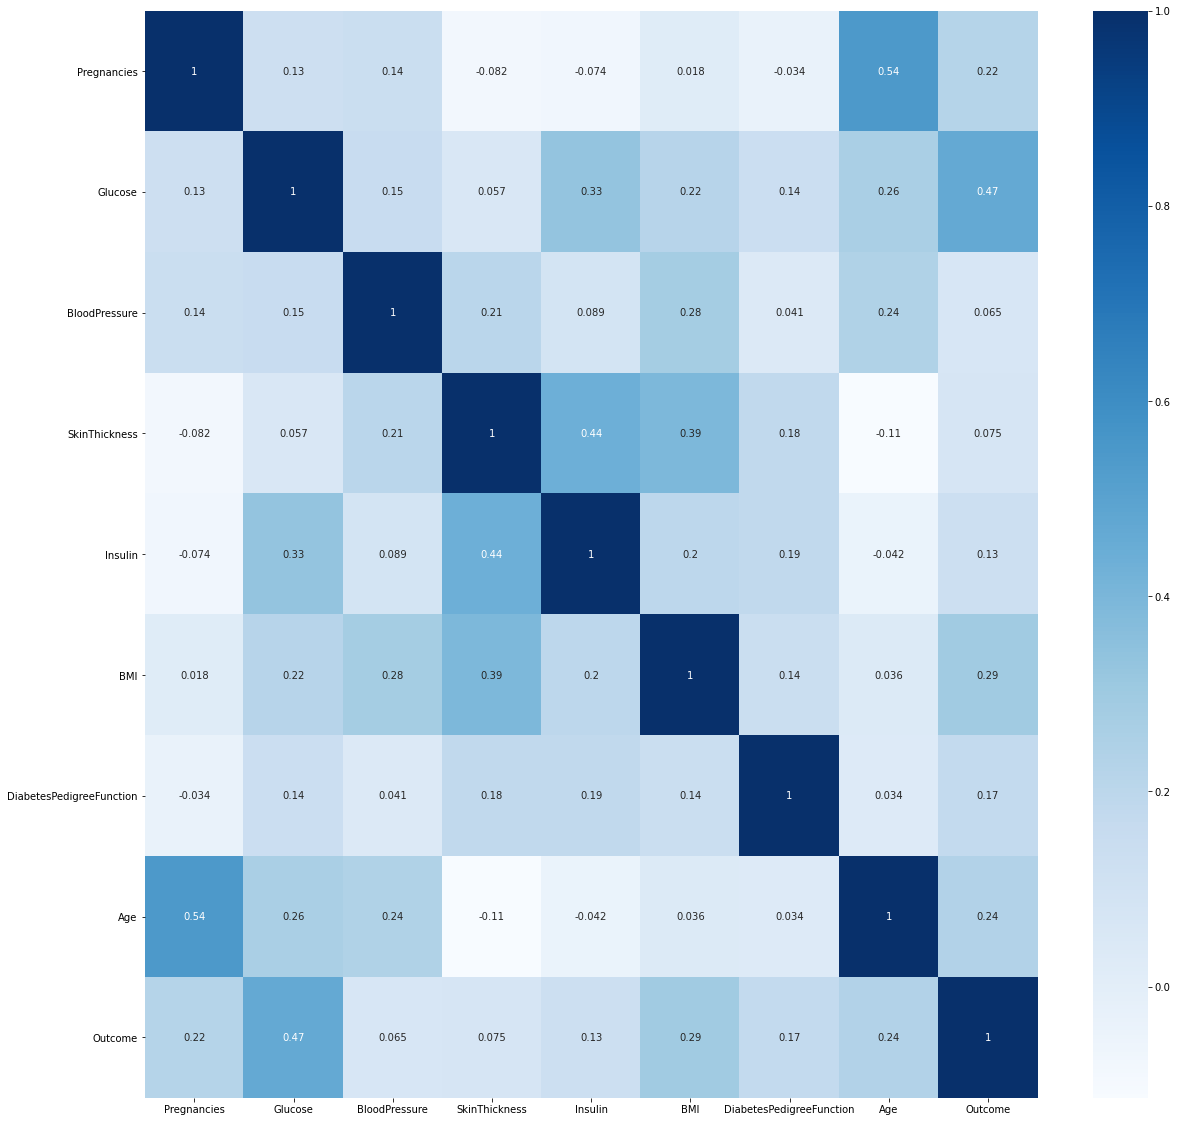

In [9]:
# Correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="Blues")

In [10]:
# Checking for NaN values in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
for cols in df.columns:
    print(cols)
    print(df[cols].value_counts())

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
Glucose
99     17
100    17
129    14
125    14
106    14
       ..
169     1
61      1
178     1
177     1
199     1
Name: Glucose, Length: 136, dtype: int64
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
82     30
66     30
88     25
84     23
90     22
58     21
86     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
96      4
44      4
110     3
106     3
100     3
98      3
108     2
104     2
46      2
55      2
30      2
95      1
61      1
102     1
38      1
40      1
24      1
114     1
122     1
Name: BloodPressure, dtype: int64
SkinThickness
0     227
32     31
30     27
27     23
23     22
18     20
28     20
33     20
31     19
19   

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1ff0d58e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1ff0d5fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1ff0d5550>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1ff0e36a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1ff0e3a00>,
 'means': []}

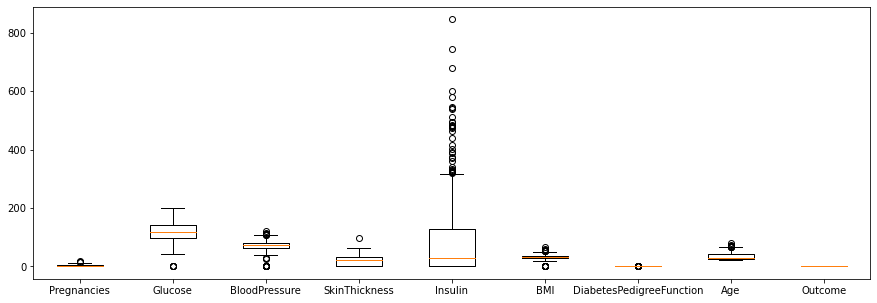

In [12]:
# Visualizing the outliers
fig=plt.figure(figsize=(15,5))
plt.boxplot(df, labels=df.columns)

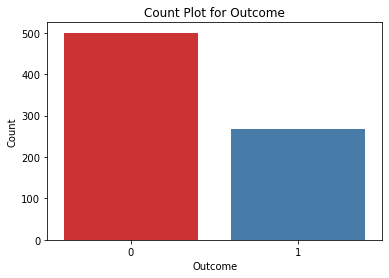

In [13]:
countplot = sns.countplot(x=df['Outcome'], data=df, palette='Set1')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Count Plot for Outcome')
plt.show()

Dataset is not imbalanced

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


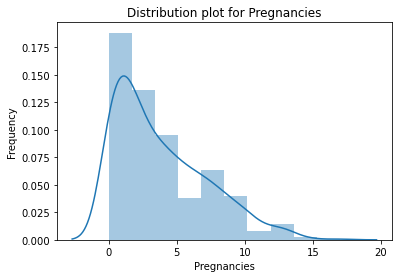

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


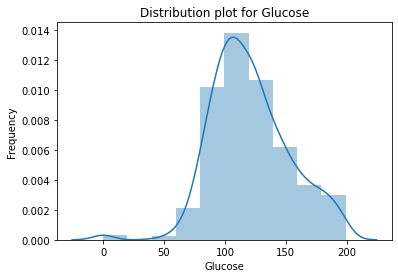

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


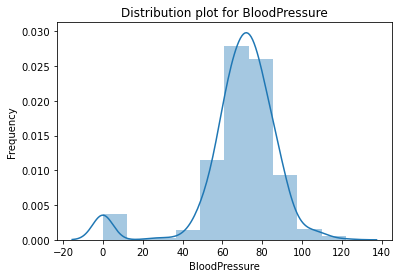

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


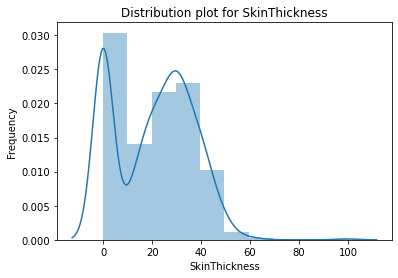

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


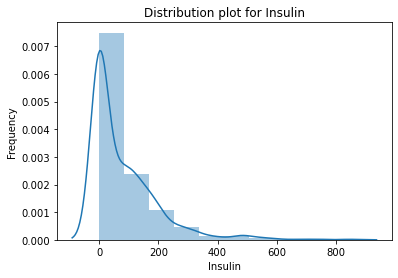

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


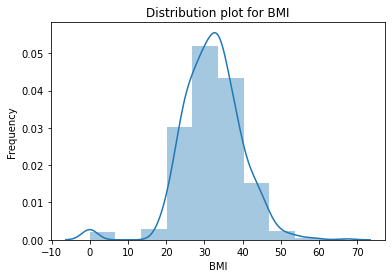

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


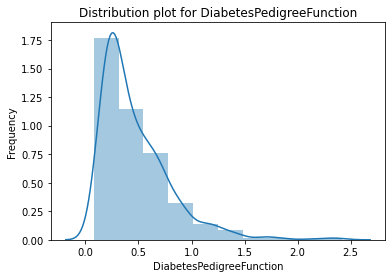

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


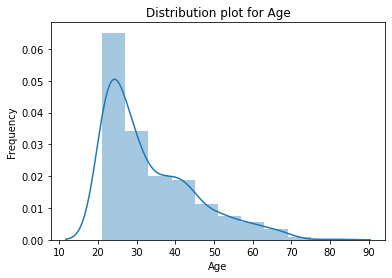

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


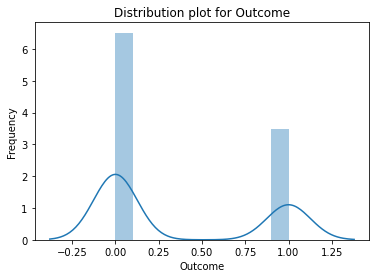

In [14]:
# Visualization of the features of the dataset using Distribution Plots
for cols in df.columns:
    distributionplot = sns.distplot(a=df[cols], bins=10, hist=True, kde=True)
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    plt.title('Distribution plot for ' + cols)
    plt.show()

###### Step 4: Data Preprocessing

Data Preprocessing on Train Data

In [15]:
# Input DataFrame
X=df.iloc[:,0:-1]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [16]:
# Target DataFrame
Y=df.iloc[:,-1]
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


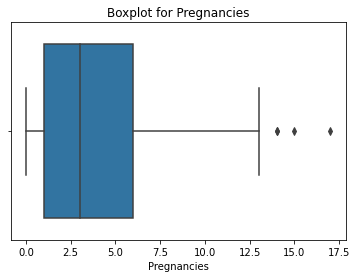

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


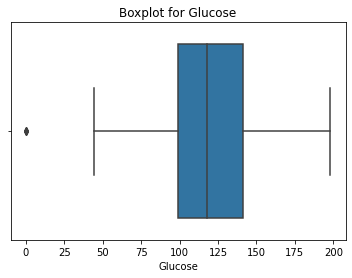

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


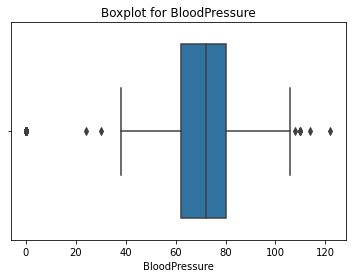

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


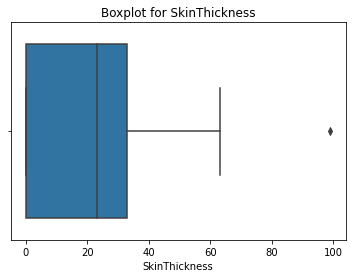

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


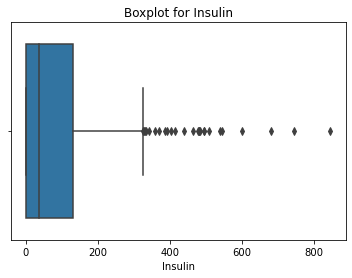

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


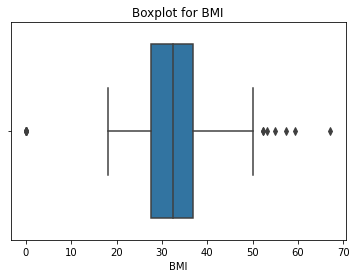

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


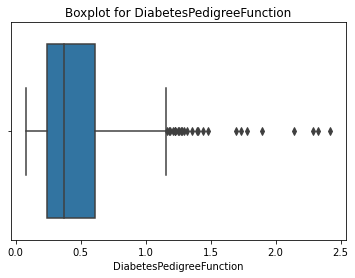

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


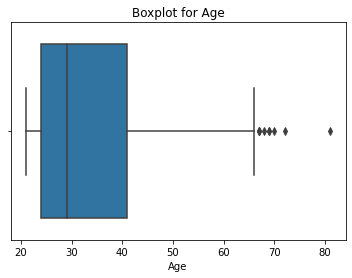

In [18]:
for cols in X_train.columns:
    bp = sns.boxplot(X_train[cols])
    plt.xlabel(cols)
    plt.title('Boxplot for ' + cols)
    plt.show()

In [19]:
# Handling the outliers using quantile-based Capping and Flooring techniqueupper_limit = X_train['bmi'].quantile(0.99)
for col in X_train.columns:
    upper_limit = X_train[col].quantile(0.99)
    lower_limit = X_train[col].quantile(0.01)
    X_train[col] = np.where(X_train[col] >= upper_limit, upper_limit,
            np.where(X_train[col] <= lower_limit, lower_limit, X_train[col]))

Data Preprocessing on Testing Data

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


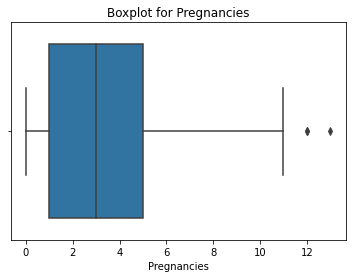

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


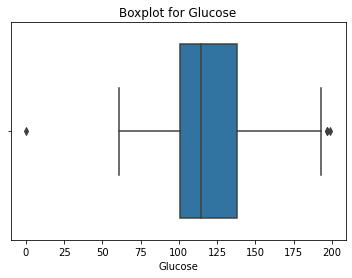

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


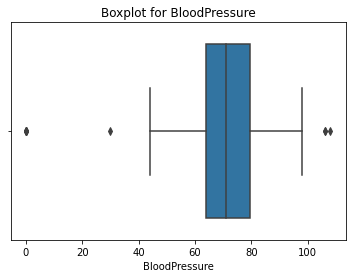

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


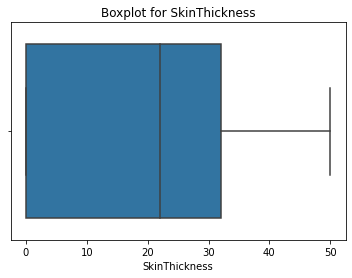

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


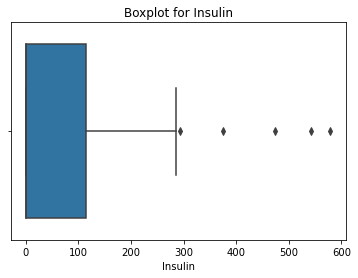

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


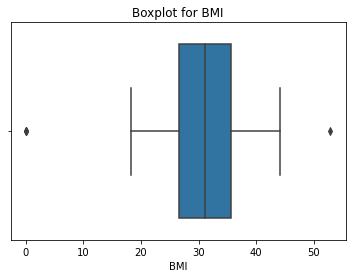

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


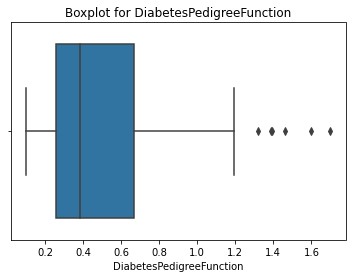

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


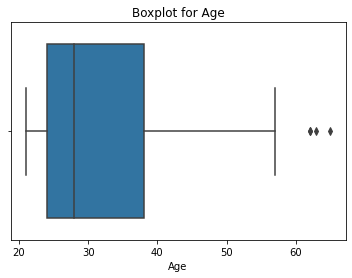

In [20]:
for cols in X_test.columns:
    bp = sns.boxplot(X_test[cols])
    plt.xlabel(cols)
    plt.title('Boxplot for ' + cols)
    plt.show()

In [21]:
# Handling the outliers using quantile-based Capping and Flooring techniqueupper_limit = X_train['bmi'].quantile(0.99)
for col in X_test.columns:
    upper_limit = X_test[col].quantile(0.99)
    lower_limit = X_test[col].quantile(0.01)
    X_test[col] = np.where(X_test[col] >= upper_limit, upper_limit,
            np.where(X_test[col] <= lower_limit, lower_limit, X_test[col]))

###### Step 5: Model Building

In [22]:
from sklearn import tree
model_decision_tree = tree.DecisionTreeClassifier()
model_decision_tree.fit(X_train,Y_train)

Y_pred_train_decision_tree = model_decision_tree.predict(X_train)
Y_pred_test_decision_tree = model_decision_tree.predict(X_test)

[Text(0.41106892523364486, 0.96875, 'X[1] <= 123.5\ngini = 0.461\nsamples = 614\nvalue = [393, 221]'),
 Text(0.1594626168224299, 0.90625, 'X[7] <= 28.5\ngini = 0.301\nsamples = 352\nvalue = [287, 65]'),
 Text(0.0514018691588785, 0.84375, 'X[5] <= 30.95\ngini = 0.162\nsamples = 202\nvalue = [184, 18]'),
 Text(0.028037383177570093, 0.78125, 'X[0] <= 7.0\ngini = 0.036\nsamples = 110\nvalue = [108, 2]'),
 Text(0.018691588785046728, 0.71875, 'X[6] <= 0.672\ngini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(0.009345794392523364, 0.65625, 'gini = 0.0\nsamples = 99\nvalue = [99, 0]'),
 Text(0.028037383177570093, 0.65625, 'X[6] <= 0.697\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.018691588785046728, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.037383177570093455, 0.59375, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.037383177570093455, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07476635514018691, 0.78125, 'X[2] <= 53.0\ngini = 0.287\nsampl

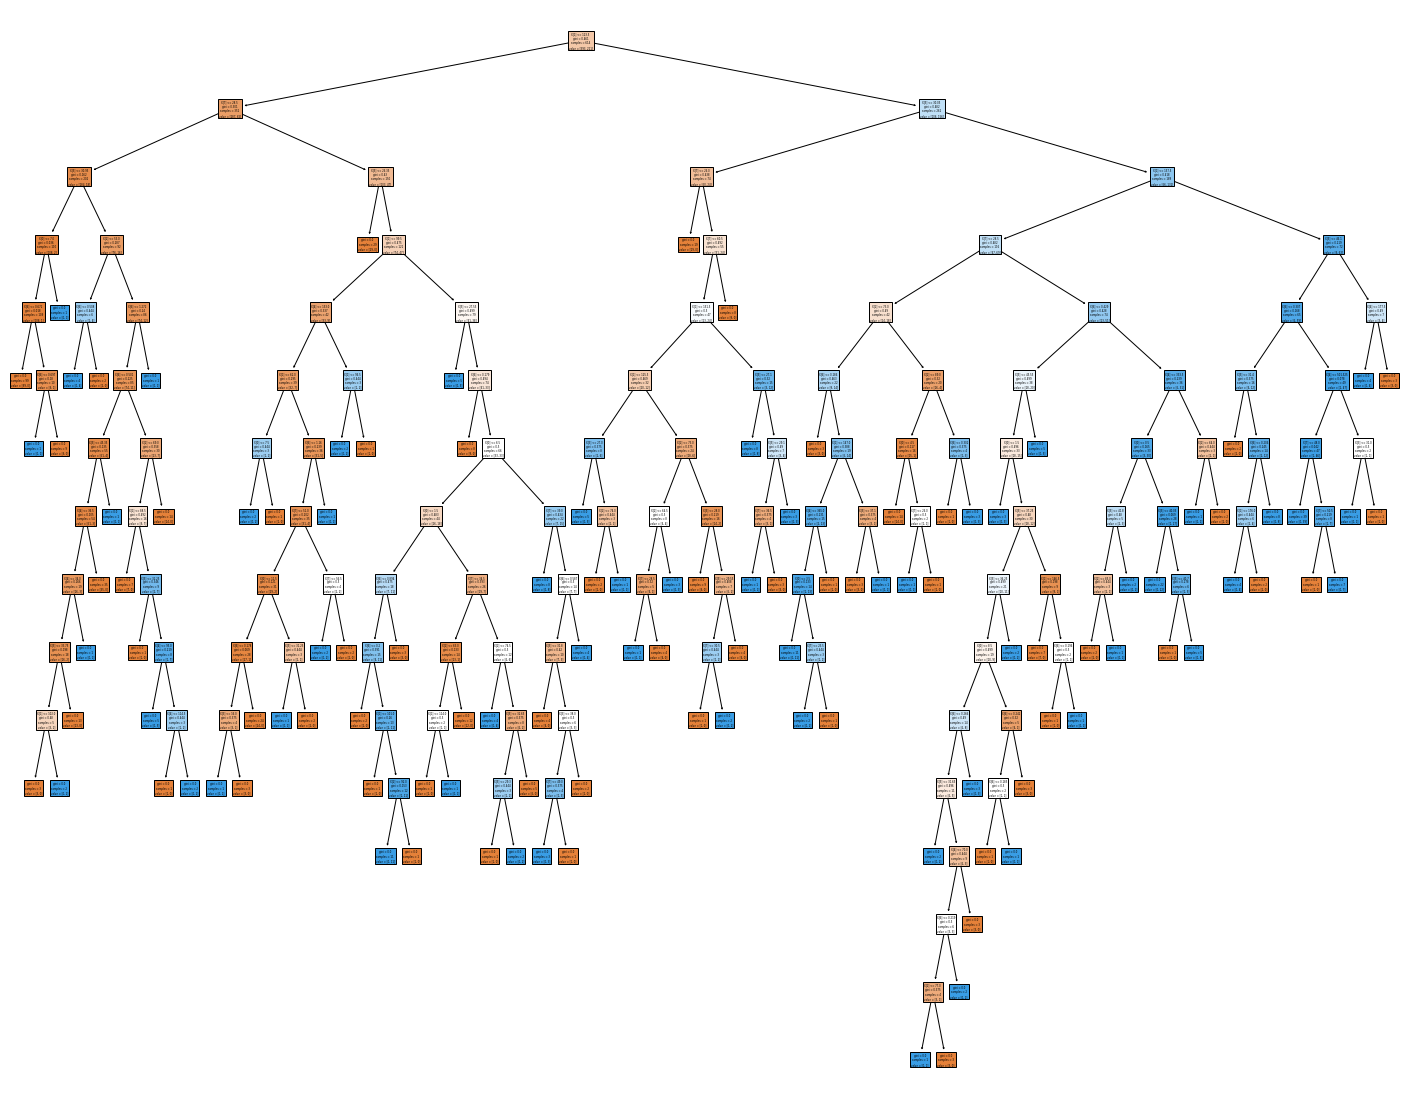

In [23]:
fig = plt.figure(figsize=(25,20))

tree.plot_tree(model_decision_tree, filled=True)

###### Step 6: Model Evaluation


Confusion Matrix:

Train accuracy: 1.0
Test accuracy: 0.7792207792207793
Recall Score: 0.7021276595744681
Precision Score: 0.6226415094339622
F1 Score: 0.66


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


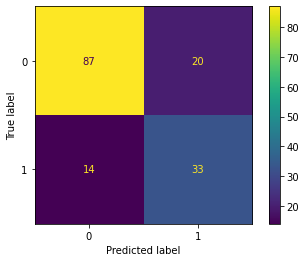

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, precision_score, plot_confusion_matrix
print('\nConfusion Matrix:\n')
plot_confusion_matrix(model_decision_tree, X_test, Y_test) 

print('Train accuracy: ' + str(accuracy_score(Y_train, Y_pred_train_decision_tree)))
print('Test accuracy: ' + str(accuracy_score(Y_test, Y_pred_test_decision_tree)))
print('Recall Score: ' + str(recall_score(Y_test, Y_pred_test_decision_tree)))
print('Precision Score: ' + str(precision_score(Y_test, Y_pred_test_decision_tree)))
print('F1 Score: ' + str(f1_score(Y_test, Y_pred_test_decision_tree)))


In [25]:
print('\nClassification Report:\n')
print(classification_report(Y_test, Y_pred_test_decision_tree))


Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       107
           1       0.62      0.70      0.66        47

    accuracy                           0.78       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.79      0.78      0.78       154

